# Feature Dihedral Contact

Usage: function plotting will plot rmsd, rmsd histogram, rmsf and PCA projection

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import MDAnalysis as mda
import itertools    
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import os

#XRD Ensemble

#28 4NPQ
#18 4HFI

In [2]:
residue_selection = 'resSeq 8 to 316'

In [3]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3',
              '5NJY_F238L_pH46_md1','5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1',
              '4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5',
              '4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1',
              '4NPQ_F238LI233T_pH46_md1','4NPQ_F238L_pH46_md1',
              '4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [4]:
md_data = pd.read_csv("glic_gating_phi_psi.csv")

KeyboardInterrupt: 

In [291]:
md_data

,Unnamed: 0,MD_name,pH,replicate,traj_time,system,cos psi[0 1 2 4],sin psi[0 1 2 4],cos psi[4 5 6 8],sin psi[4 5 6 8],...,"contact(239, 1506)","contact(239, 1508)","contact(239, 1509)","contact(239, 1511)","contact(239, 1512)","contact(239, 1513)","contact(239, 1515)","contact(239, 1516)","contact(239, 1517)","contact(239, 1519)"
0,1,5NJY,70,1,0,0,-0.957918,0.287041,-0.955311,0.295604,...,3.235968,3.428427,3.460815,3.894829,3.777868,3.983669,4.326745,4.303825,4.571945,4.811116
1,2,5NJY,70,1,1,0,-0.757453,0.652889,-0.925558,0.378606,...,3.218329,3.383349,3.410963,3.885251,3.773241,3.985411,4.300177,4.355986,4.581243,4.823878
2,3,5NJY,70,1,2,0,-0.470708,0.882289,-0.963812,0.266581,...,3.268765,3.406718,3.463593,3.878417,3.762231,3.997145,4.270919,4.330912,4.567532,4.810034
3,4,5NJY,70,1,3,0,-0.647922,0.761707,-0.981898,0.189409,...,3.351155,3.529355,3.555644,4.049688,3.890810,4.087610,4.417820,4.435314,4.654546,4.924081
4,5,5NJY,70,1,4,0,-0.739666,0.672974,-0.823248,0.567681,...,3.298342,3.479170,3.471232,3.936859,3.843444,4.028644,4.348099,4.376375,4.624271,4.839828
5,6,5NJY,70,1,5,0,-0.964814,0.262932,-0.930024,0.367499,...,3.299865,3.459341,3.495449,3.937435,3.809749,4.030818,4.317192,4.361280,4.625359,4.797715
6,7,5NJY,70,1,6,0,-0.678689,0.734425,-0.851512,0.524335,...,3.239141,3.377101,3.426429,3.843569,3.735924,3.960568,4.229764,4.337831,4.543926,4.839520
7,8,5NJY,70,1,7,0,-0.972395,0.233341,-0.937659,0.347557,...,3.232813,3.377870,3.455721,3.877763,3.773315,4.022981,4.294913,4.350758,4.592020,4.791639
8,9,5NJY,70,1,8,0,-0.457346,0.889289,-0.861114,0.508412,...,3.324369,3.458358,3.505136,3.945585,3.868936,4.081840,4.395312,4.456980,4.686960,4.935672
9,10,5NJY,70,1,9,0,-0.609502,0.792784,-0.923709,0.383095,...,3.239768,3.399770,3.474356,3.910640,3.881630,4.080336,4.333837,4.415589,4.662765,4.910417


In [14]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'cos psi[0 1 2 4]', 'sin psi[0 1 2 4]', 'cos psi[4 5 6 8]',
       'sin psi[4 5 6 8]',
       ...
       'contact(239, 1506)', 'contact(239, 1508)', 'contact(239, 1509)',
       'contact(239, 1511)', 'contact(239, 1512)', 'contact(239, 1513)',
       'contact(239, 1515)', 'contact(239, 1516)', 'contact(239, 1517)',
       'contact(239, 1519)'],
      dtype='object', length=13451)

## Analysis

In [244]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)], abs(data - np.mean(data)) < m * np.std(data)

In [137]:
md_data = md_data[(md_data.system >= 0) & (md_data.system <= 15)]

In [138]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [283]:
def create_svmcv(md_test):
    md_feature = pd.read_csv("glic_gating_new.csv")
    md_feature = md_feature[(md_feature.system >= 0) & (md_feature.system <= 15)]
    md_feature = md_feature.iloc[md_test.index]
    test_X = md_data.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','system','Unnamed: 0'])
    scaler = StandardScaler()
    scaler.fit(test_X.iloc[md_test.index])
    test_x_scaled = scaler.transform(test_X.iloc[md_test.index])
    
    trainset = md_test.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','Unnamed: 0'])
    trainset = trainset[((md_feature['hydration_data'] >= 40) | (md_feature['hydration_data'] <= 15))]
    trainset.loc[(md_feature['hydration_data'] >= 40),'system'] = 1
    trainset.loc[(md_feature['hydration_data'] <= 15),'system'] = 0
    trainset = trainset.reset_index()
    trainset = trainset.drop(['index'],axis=1)
    Y = trainset.as_matrix()[:,0]
    X = scaler.transform(trainset.as_matrix()[:,1:])
    clf = SVC(kernel="linear")
    clf.fit(X,Y)
    b=clf.decision_function(test_x_scaled)/np.linalg.norm(clf.coef_)
    b, index = reject_outliers(b)
    b_stand = (b - b.min()) / (b.max() - b.min())
    md_feature = md_feature[index]
    md_feature['svmcv'] = b_stand
    print(md_data.columns[np.argsort(-np.abs(clf.coef_))[0]][:10])
    group = md_feature.groupby(['MD_name','pH'])['svmcv']
    mean = group.mean()
    errors = group.std()
    ax = plt.subplot()
    mean.plot.bar(yerr=errors,ax=ax)
    plt.show()
    ax = plt.subplot()
    md_feature.plot(kind="scatter",x="traj_time",y="svmcv",c='system',ax=ax,colormap='Pastel2')
    plt.show()

Index(['contact(227, 1272)', 'contact(226, 1272)', 'contact(223, 1272)',
       'contact(222, 1272)', 'contact(224, 1272)', 'contact(231, 583)',
       'contact(225, 1272)', 'contact(227, 1204)',
       'sin psi[4476 4477 4478 4480]', 'contact(231, 580)'],
      dtype='object')


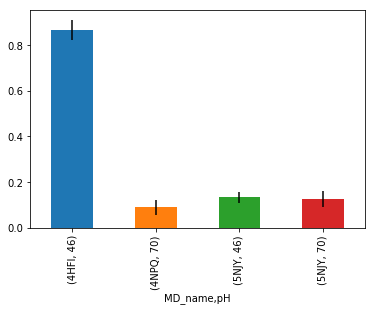

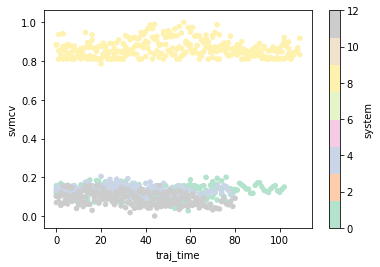

In [284]:
create_svmcv(md_WT)

Index(['cos psi[3940 3941 3942 3944]', 'cos psi[4416 4417 4418 4420]',
       'cos phi[5186 5188 5189 5190]', 'sin psi[3412 3413 3414 3416]',
       'sin psi[448 449 450 452]', 'sin phi[5634 5636 5637 5638]',
       'cos phi[3438 3440 3441 3442]', 'sin phi[4142 4144 4145 4146]',
       'sin psi[4688 4689 4690 4692]', 'sin phi[410 412 413 414]'],
      dtype='object')


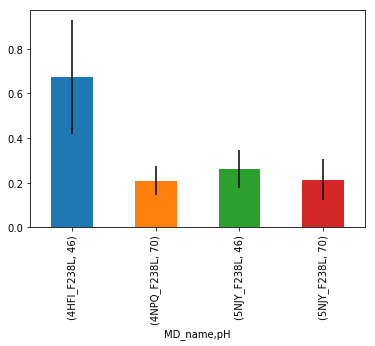

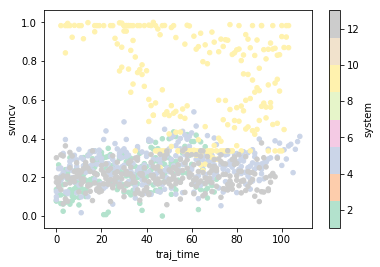

In [285]:
create_svmcv(md_F238L)

Index(['cos psi[3180 3181 3182 3184]', 'sin phi[5262 5264 5265 5266]',
       'sin psi[5260 5261 5262 5264]', 'cos phi[3178 3180 3181 3182]',
       'cos psi[3176 3177 3178 3180]', 'cos psi[2208 2209 2210 2212]',
       'cos psi[2128 2129 2130 2132]', 'sin phi[2958 2960 2961 2962]',
       'cos phi[4554 4556 4557 4558]', 'sin psi[2208 2209 2210 2212]'],
      dtype='object')


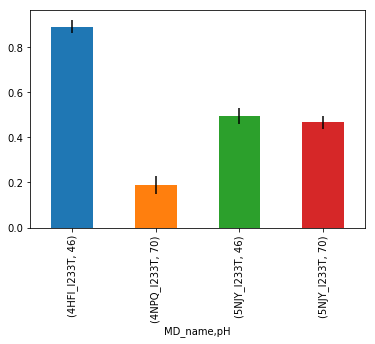

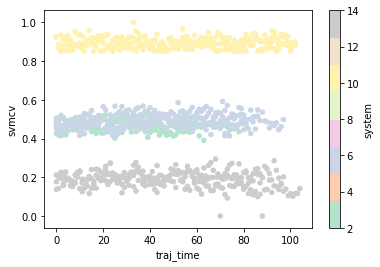

In [286]:
create_svmcv(md_I233T)

Index(['sin phi[2530 2532 2533 2534]', 'cos psi[4336 4337 4338 4340]',
       'cos psi[5256 5257 5258 5260]', 'cos psi[3236 3237 3238 3240]',
       'sin phi[2786 2788 2789 2790]', 'cos psi[4532 4533 4534 4536]',
       'sin phi[4534 4536 4537 4538]', 'cos phi[2306 2308 2309 2310]',
       'cos psi[300 301 302 304]', 'cos phi[4338 4340 4341 4342]'],
      dtype='object')


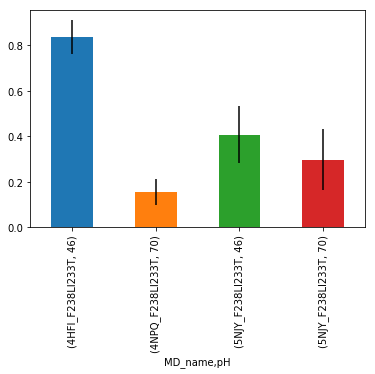

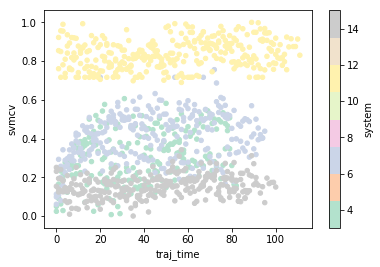

In [287]:
create_svmcv(md_F238LI233T)

In [288]:
def create_svmcv():
    md_data = pd.read_csv("glic_gating_new.csv")
    md_data = md_data[(md_data.system >= 0) & (md_data.system <= 15)]
    md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
    md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
    md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
    md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]
    for md_test in [md_WT,md_F238L,md_I233T,md_F238LI233T]:
        md_feature = pd.read_csv("glic_gating_new.csv")
        md_feature = md_feature[(md_feature.system >= 0) & (md_feature.system <= 15)]
        md_feature = md_feature.iloc[md_test.index]
        test_X = md_feature.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','system','Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1'])
        scaler = StandardScaler()
        scaler.fit(test_X)
        test_x_scaled = scaler.transform(test_X)

        trainset = md_test.drop(columns=['MD_name', 'pH', 'replicate', 'traj_time','Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1'])
        trainset = trainset[((md_feature['hydration_data'] >= 40) | (md_feature['hydration_data'] <= 15))]
        trainset.loc[(md_feature['hydration_data'] >= 40),'system'] = 1
        trainset.loc[(md_feature['hydration_data'] <= 15),'system'] = 0
        trainset = trainset.reset_index()
        trainset = trainset.drop(['index'],axis=1)
        Y = trainset.as_matrix()[:,0]
        X = scaler.transform(trainset.as_matrix()[:,1:])
        clf = SVC(kernel="linear")
        clf.fit(X,Y)
        b=clf.decision_function(test_x_scaled)/np.linalg.norm(clf.coef_)
        b, index = reject_outliers(b)
        b_stand = (b - b.min()) / (b.max() - b.min())
        md_feature = md_feature[index]

        md_feature['svmcv'] = b_stand
        print(trainset.columns[np.argsort(-np.abs(clf.coef_))[0]][:10])
        group = md_feature.groupby(['MD_name','pH'])['svmcv']
        mean = group.mean()
        errors = group.std()
        ax = plt.subplot()
        mean.plot.bar(yerr=errors,ax=ax)
        plt.show()
        ax = plt.subplot()
        md_feature.plot(kind="scatter",x="traj_time",y="svmcv",c='system',ax=ax,colormap='Pastel2')
        plt.show()

Index(['ECD_radius', 'ecd_pc1', 'ecd_pc2', 'wholepca_pc1',
       'hydration_data_233_3a', 'M1_kink', 'helix twist angle',
       'hydration_data_226_3a', 'hydration_data_10a', 'helix tilt angle'],
      dtype='object')


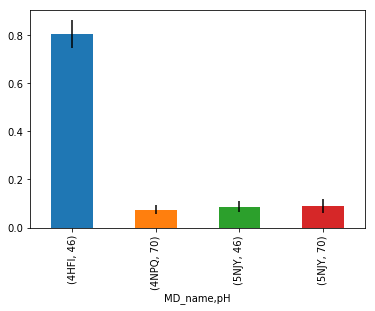

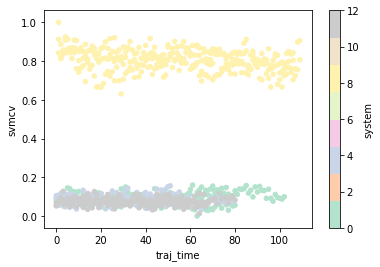

Index(['helix twist angle', 'hydration_data_233_3a', 'hydration_data_226_3a',
       'M1_kink', 'hydration_data_10a', 'hydration_data_235_3a',
       'pore_profile_240', 'domain twist', 'pore_profile_237',
       'pore_profile_222'],
      dtype='object')


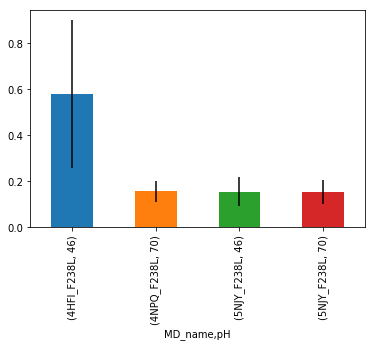

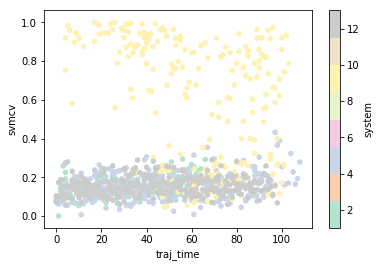

Index(['ecd_pc2', 'helix twist angle', 'hydration_data',
       'hydration_data_226_3a', 'rmsd', 'ecd_pc1', 'hydration_data_10a',
       'beta_expansion', 'helix tilt angle', 'M1_kink'],
      dtype='object')


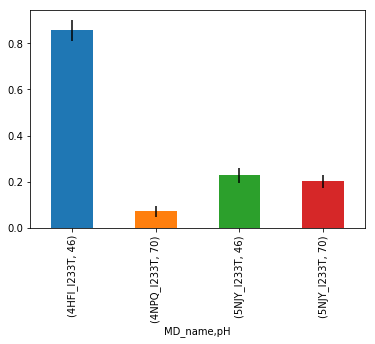

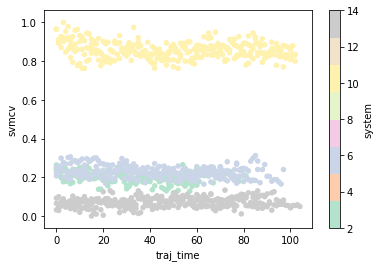

Index(['helix twist angle', 'hydration_data_226_3a', 'hydration_data_235_3a',
       'M1_kink', 'tmd_pc2', 'hydration_data_238_3a', 'M2_radius',
       'hydration_data_233_3a', 'helix tilt angle', 'hydration_data'],
      dtype='object')


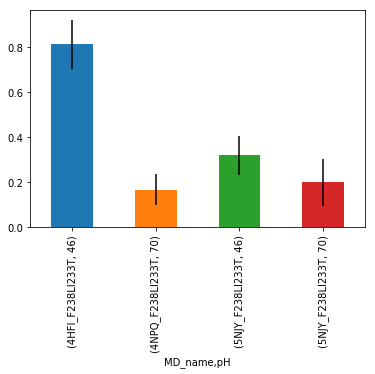

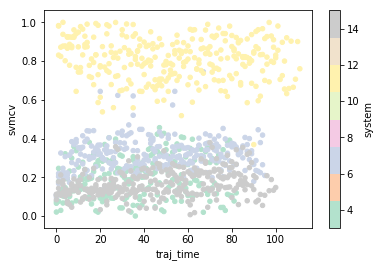

In [289]:
create_svmcv()